In [38]:
from csv_cleaner import clean_df
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor
from pipeline import ML_pipeline
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Imports des données, nettoyage et split entre features et target

In [27]:
df = pd.read_csv("train.csv")
train = clean_df(df)

X = train.drop('Price', axis=1)
y = train['Price']

In [28]:
svr = ML_pipeline(SVR(), X, y)
gbr = ML_pipeline(GBR(), X, y)
rfr = ML_pipeline(RandomForestRegressor(), X, y)

In [29]:
svr.data_conversion()
gbr.data_conversion()
rfr.data_conversion()

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'Kilometers_Driven',
                                                   'Mileage', 'Engine', 'Power',
                                                   'New_Price']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Brand', 'Location',
                                                   'Fuel_Type', 'Transmission',
                                                   'Owner_Type'])])),
                ('randomforestregressor', RandomForestRegressor())])

# Paramètrage des Gridsearch

In [30]:
svm_param_grid = {'svr__C' : [17,19,25],
              'svr__epsilon' : [0.35, 0.4, 0.45]}

rfr_param_grid = {
    'randomforestregressor__n_estimators': [100,300],
    'randomforestregressor__max_depth': [5, 10]
}

gbr_param_grid = {
    'gradientboostingregressor__n_estimators': [100, 200, 300],
    'gradientboostingregressor__max_depth': [5, 7],
    'gradientboostingregressor__min_samples_split': [2, 4],
    'gradientboostingregressor__min_samples_leaf': [1, 3],
    'gradientboostingregressor__max_features': ['sqrt'],
    'gradientboostingregressor__subsample': [1.0]
}


In [31]:
svr_cv = GridSearchCV(svr.full_pipeline, param_grid=svr_param_grid, cv=5, scoring="neg_mean_squared_error", verbose=2)
rfr_cv = GridSearchCV(rfr.full_pipeline, param_grid=rfr_param_grid, cv=5, scoring="neg_mean_squared_error", verbose=2)
gbr_cv = GridSearchCV(gbr.full_pipeline, param_grid=gbr_param_grid, cv=5, scoring="neg_mean_squared_error", verbose=2)


In [32]:
svr.model_train_and_eval(svr_cv)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[CV] END .........................svr__C=1, svr__epsilon=0.1; total time=   1.8s
[CV] END .........................svr__C=1, svr__epsilon=0.1; total time=   1.3s
[CV] END .........................svr__C=1, svr__epsilon=0.1; total time=   1.2s
[CV] END .........................svr__C=1, svr__epsilon=0.1; total time=   1.0s
[CV] END .........................svr__C=1, svr__epsilon=0.1; total time=   1.3s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .........................svr__C=1, svr__epsilon=0.1; total time=   1.0s
[CV] END .........................svr__C=1, svr__epsilon=0.1; total time=   1.1s
[CV] END .........................svr__C=1, svr__epsilon=0.1; total time=   1.1s
[CV] END .........................svr__C=1, svr__epsilon=0.1; total time=   1.1s
[CV] END .........................svr__C=1, svr__epsilon=0.1; total time=   1.2s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .........................svr__C=1, svr__epsilon=0.1; total time

In [33]:
rfr.model_train_and_eval(rfr_cv)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END randomforestregressor__max_depth=5, randomforestregressor__n_estimators=100; total time=   1.6s
[CV] END randomforestregressor__max_depth=5, randomforestregressor__n_estimators=100; total time=   1.8s
[CV] END randomforestregressor__max_depth=5, randomforestregressor__n_estimators=100; total time=   1.8s
[CV] END randomforestregressor__max_depth=5, randomforestregressor__n_estimators=100; total time=   1.6s
[CV] END randomforestregressor__max_depth=5, randomforestregressor__n_estimators=100; total time=   1.7s
[CV] END randomforestregressor__max_depth=5, randomforestregressor__n_estimators=300; total time=   5.7s
[CV] END randomforestregressor__max_depth=5, randomforestregressor__n_estimators=300; total time=   4.6s
[CV] END randomforestregressor__max_depth=5, randomforestregressor__n_estimators=300; total time=   4.7s
[CV] END randomforestregressor__max_depth=5, randomforestregressor__n_estimators=300; total time=   

8 minutes pour gbr

In [34]:
gbr.model_train_and_eval(gbr_cv)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END gradientboostingregressor__max_depth=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__min_samples_leaf=1, gradientboostingregressor__min_samples_split=2, gradientboostingregressor__n_estimators=100, gradientboostingregressor__subsample=1.0; total time=   0.3s
[CV] END gradientboostingregressor__max_depth=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__min_samples_leaf=1, gradientboostingregressor__min_samples_split=2, gradientboostingregressor__n_estimators=100, gradientboostingregressor__subsample=1.0; total time=   0.3s
[CV] END gradientboostingregressor__max_depth=5, gradientboostingregressor__max_features=sqrt, gradientboostingregressor__min_samples_leaf=1, gradientboostingregressor__min_samples_split=2, gradientboostingregressor__n_estimators=100, gradientboostingregressor__subsample=1.0; total time=   0.3s
[CV] END gradientboostingregressor__max_depth=5, g

SVR()
Mean MSE Score : 5.421675239167531
Mean RMSE Score : 2.320873043970439
Mean R2 Score : 0.8954031512323727
Best GridSearch parameters : {'svr__C': 1, 'svr__epsilon': 0.1}
RandomForestRegressor()
Mean MSE Score : 4.302169881532885
Mean RMSE Score : 2.0705790333646408
Mean R2 Score : 0.916295705346006
Best GridSearch parameters : {'randomforestregressor__max_depth': 10, 'randomforestregressor__n_estimators': 300}
GradientBoostingRegressor()
Mean MSE Score : 2.9851838429458573
Mean RMSE Score : 1.7257489438198976
Mean R2 Score : 0.9420990958089686
Best GridSearch parameters : {'gradientboostingregressor__max_depth': 7, 'gradientboostingregressor__max_features': 'sqrt', 'gradientboostingregressor__min_samples_leaf': 3, 'gradientboostingregressor__min_samples_split': 4, 'gradientboostingregressor__n_estimators': 300, 'gradientboostingregressor__subsample': 1.0}


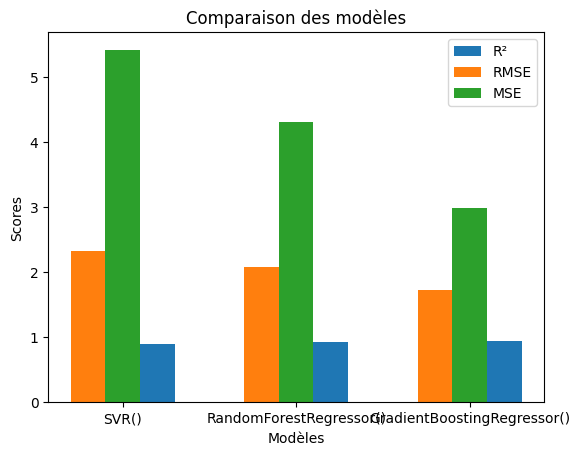

(None, [None, None, None])

In [36]:
ML_pipeline.make_graph([svr, rfr, gbr])

In [41]:
#Utilsation du modèle
import pickle

# Chemin où vous souhaitez enregistrer le modèle
chemin_fichier = 'GBR.pkl'

with open(chemin_fichier, 'wb') as fichier:
    pickle.dump(gbr_cv, fichier)
    print(f"Modèle enregistré avec succès dans {chemin_fichier}")

Modèle enregistré avec succès dans GBR.pkl
